In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/paciente4/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

49606

In [6]:
with open('dataset/generado/paciente4/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

49606

In [8]:
with open('dataset/generado/paciente4/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

6201

In [10]:
with open('dataset/generado/paciente4/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

6201

In [12]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

6201

In [14]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

6201

# Entrenamiento Vanilla LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/vanilla_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 45s 24ms/step - loss: 0.0082 - mae: 0.0696 - mse: 0.0082 - val_loss: 0.0060 - val_mae: 0.0606 - val_mse: 0.0060
Epoch 2/50
1551/1551 [==============================] - 41s 26ms/step - loss: 0.0047 - mae: 0.0526 - mse: 0.0047 - val_loss: 0.0044 - val_mae: 0.0520 - val_mse: 0.0044
Epoch 3/50
1551/1551 [==============================] - 37s 24ms/step - loss: 0.0038 - mae: 0.0474 - mse: 0.0038 - val_loss: 0.0050 - val_mae: 0.0566 - val_mse: 0.0050
Epoch 4/50
1551/1551 [==============================] - 39s 25ms/step - loss: 0.0035 - mae: 0.0451 - mse: 0.0035 - val_loss: 0.0046 - val_mae: 0.0530 - val_mse: 0.0046
Epoch 5/50
1551/1551 [==============================] - 43s 28ms/step - loss: 0.0033 - mae: 0.0438 - mse: 0.0033 - val_loss: 0.0036 - val_mae: 0.0466 - val_mse: 0.0036
Epoch 6/50
1551/1551 [==============================] - 40s 26ms/step - loss: 0.0032 - mae: 0.0432 - mse: 0.0032 - val_loss: 0.0042 - val_mae: 0.0511 - val_mse:

194/194 [==============================] - 3s 13ms/step - loss: 0.0038 - mae: 0.0467 - mse: 0.0038
test loss, test acc: [0.00375952897593379, 0.046745143830776215, 0.00375952897593379]


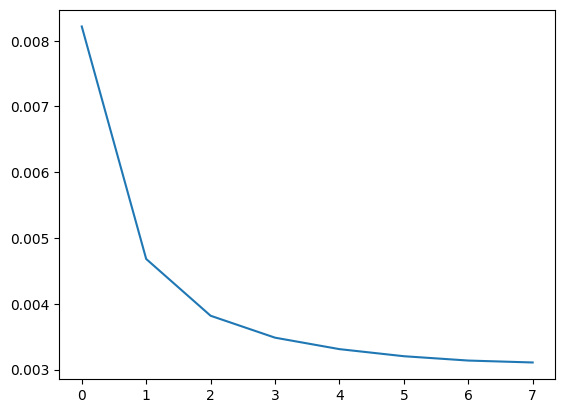

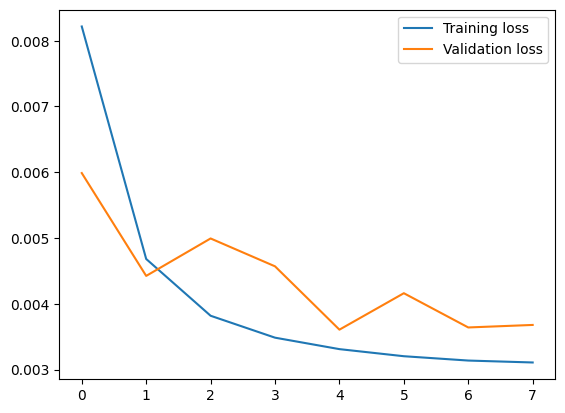

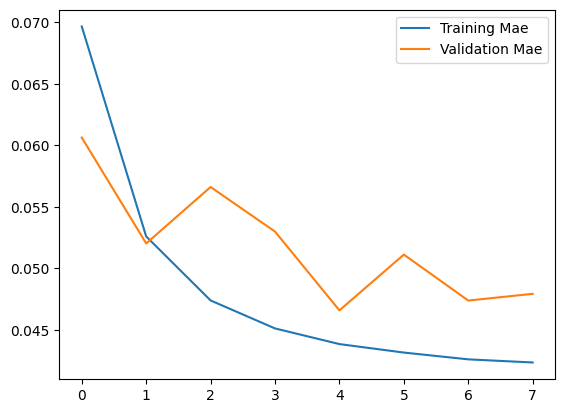

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 4s 10ms/step


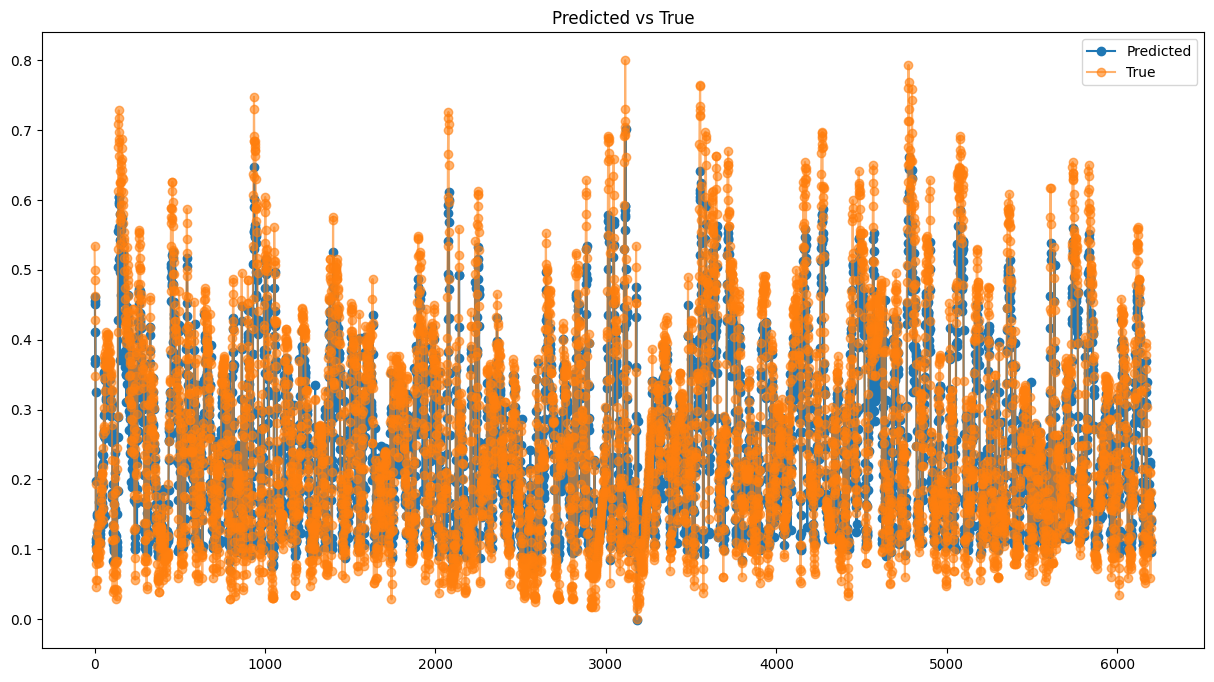

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.0467451500287884,
 'mse': 0.06131498381748587,
 'rmse': 0.0037595272405385534}

# Entrenamiento Vanilla LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/vanilla_NO_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 43s 23ms/step - loss: 0.0059 - mae: 0.0572 - mse: 0.0059 - val_loss: 0.0037 - val_mae: 0.0445 - val_mse: 0.0037
Epoch 2/50
1551/1551 [==============================] - 38s 24ms/step - loss: 0.0029 - mae: 0.0403 - mse: 0.0029 - val_loss: 0.0029 - val_mae: 0.0398 - val_mse: 0.0029
Epoch 3/50
1551/1551 [==============================] - 40s 26ms/step - loss: 0.0024 - mae: 0.0367 - mse: 0.0024 - val_loss: 0.0024 - val_mae: 0.0364 - val_mse: 0.0024
Epoch 4/50
1551/1551 [==============================] - 39s 25ms/step - loss: 0.0023 - mae: 0.0354 - mse: 0.0023 - val_loss: 0.0023 - val_mae: 0.0350 - val_mse: 0.0023
Epoch 5/50
1551/1551 [==============================] - 38s 25ms/step - loss: 0.0022 - mae: 0.0348 - mse: 0.0022 - val_loss: 0.0023 - val_mae: 0.0351 - val_mse: 0.0023
Epoch 6/50
1551/1551 [==============================] - 37s 24ms/step - loss: 0.0022 - mae: 0.0345 - mse: 0.0022 - val_loss: 0.0022 - val_mae: 0.0347 - val_mse:

194/194 [==============================] - 2s 10ms/step - loss: 0.0025 - mae: 0.0357 - mse: 0.0025
test loss, test acc: [0.0025456235744059086, 0.03574430197477341, 0.0025456235744059086]


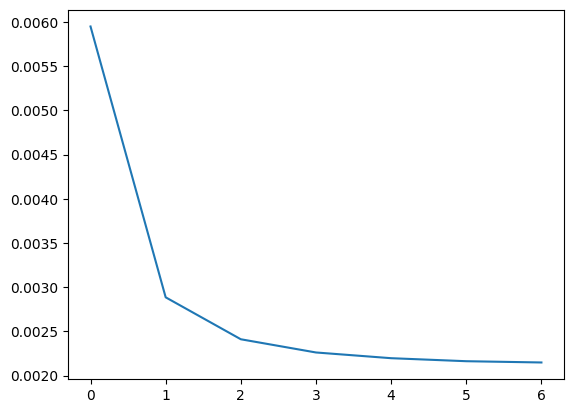

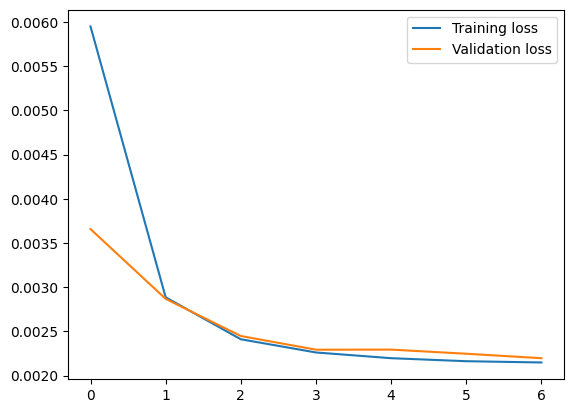

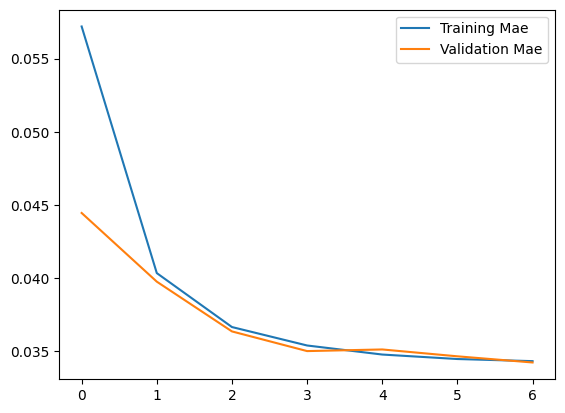

In [23]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 2s 10ms/step


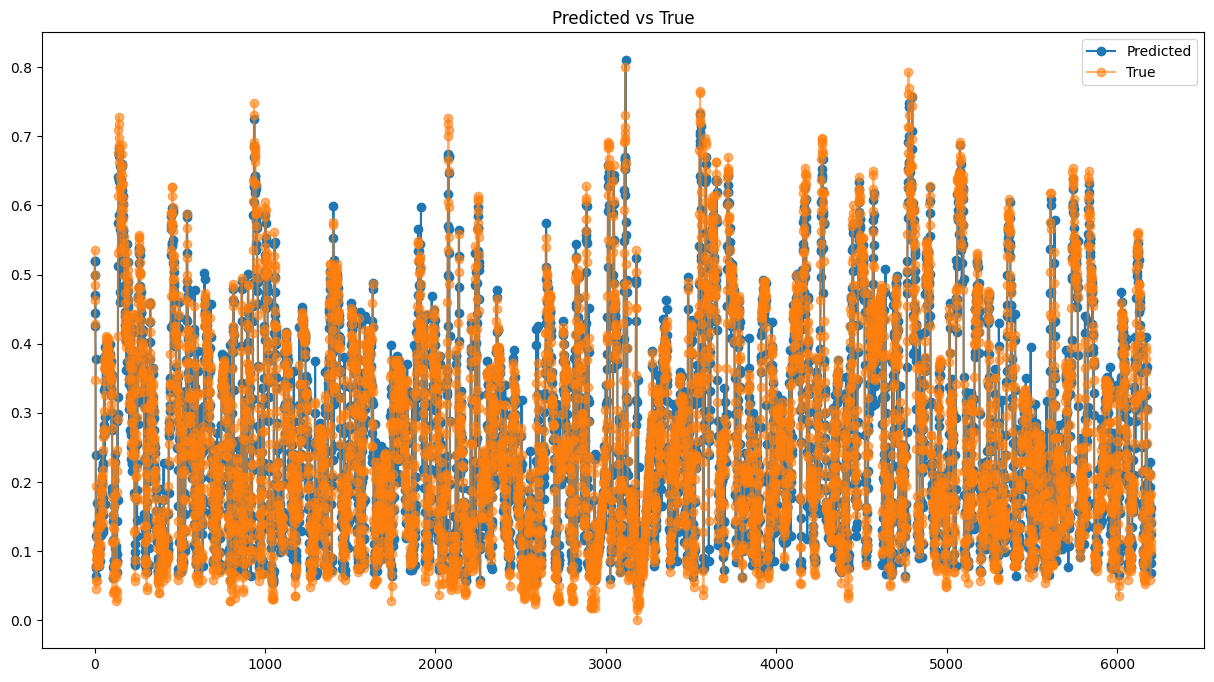

In [24]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [25]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03574429846777463,
 'mse': 0.05045417835105752,
 'rmse': 0.0025456241130803214}

# Entrenamiento Stacked LSTM sin dropout

In [26]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [27]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/stacked_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 67s 40ms/step - loss: 0.0103 - mae: 0.0780 - mse: 0.0103 - val_loss: 0.0051 - val_mae: 0.0545 - val_mse: 0.0051
Epoch 2/50
1551/1551 [==============================] - 63s 41ms/step - loss: 0.0048 - mae: 0.0534 - mse: 0.0048 - val_loss: 0.0043 - val_mae: 0.0519 - val_mse: 0.0043
Epoch 3/50
1551/1551 [==============================] - 63s 41ms/step - loss: 0.0036 - mae: 0.0463 - mse: 0.0036 - val_loss: 0.0034 - val_mae: 0.0451 - val_mse: 0.0034
Epoch 4/50
1551/1551 [==============================] - 61s 39ms/step - loss: 0.0033 - mae: 0.0437 - mse: 0.0033 - val_loss: 0.0033 - val_mae: 0.0443 - val_mse: 0.0033
Epoch 5/50
1551/1551 [==============================] - 63s 40ms/step - loss: 0.0031 - mae: 0.0424 - mse: 0.0031 - val_loss: 0.0034 - val_mae: 0.0451 - val_mse: 0.0034
Epoch 6/50
1551/1551 [==============================] - 63s 41ms/step - loss: 0.0030 - mae: 0.0418 - mse: 0.0030 - val_loss: 0.0032 - val_mae: 0.0432 - val_mse:

194/194 [==============================] - 3s 17ms/step - loss: 0.0032 - mae: 0.0430 - mse: 0.0032
test loss, test acc: [0.003222075989469886, 0.04303223639726639, 0.003222075989469886]


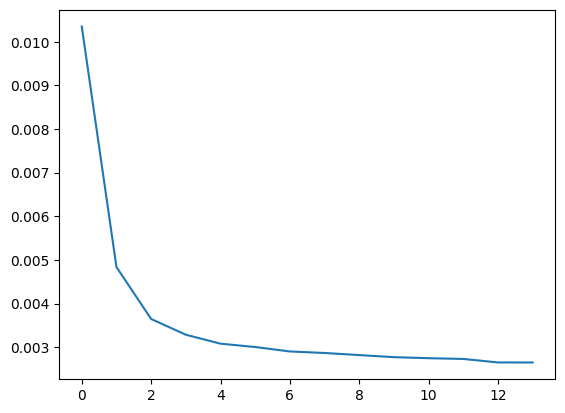

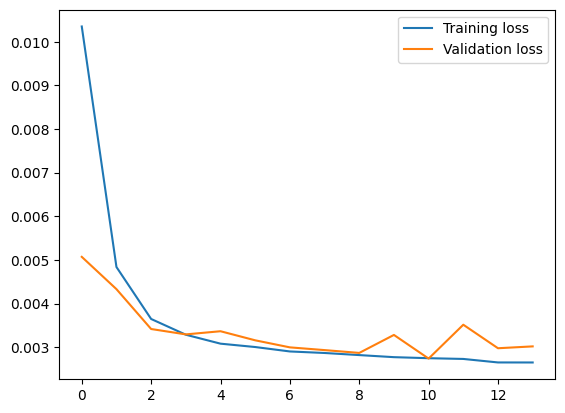

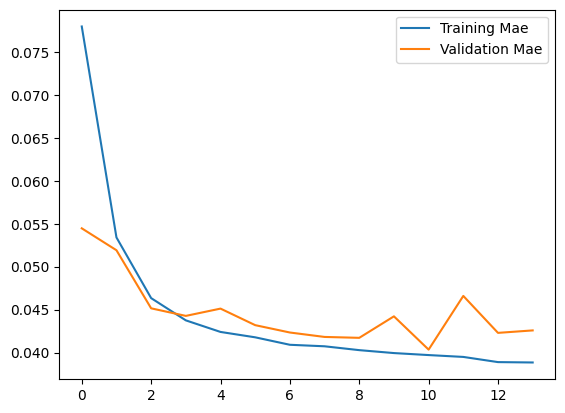

In [28]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 4s 18ms/step


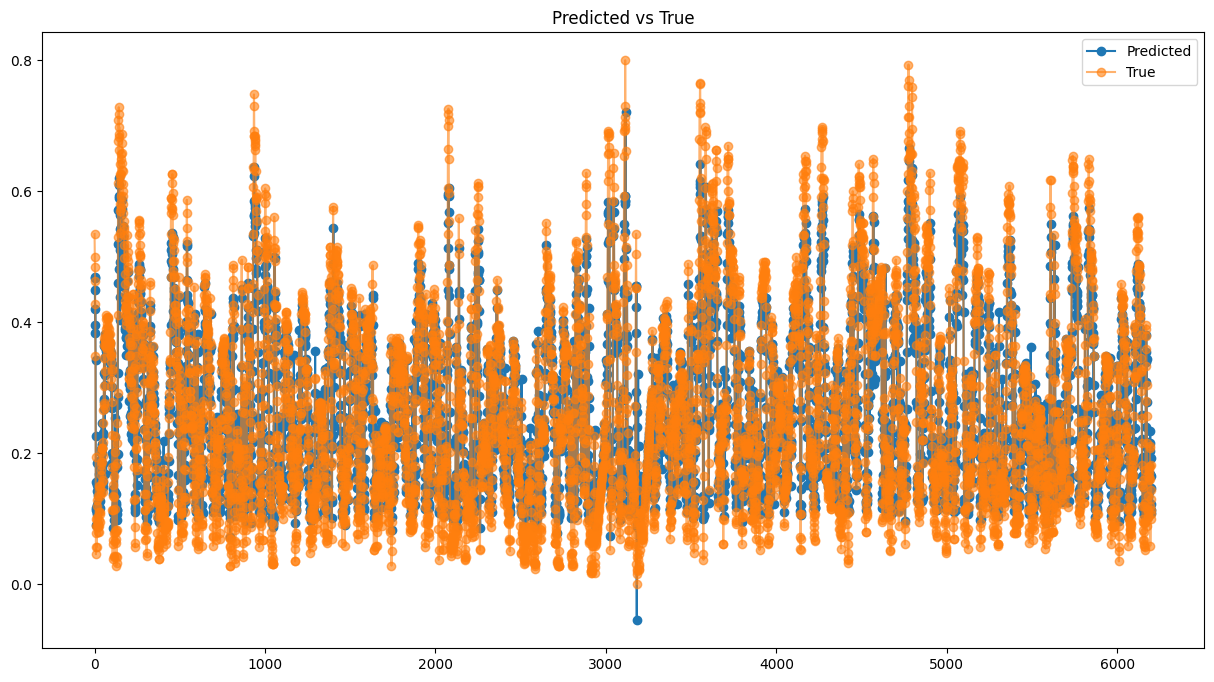

In [29]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [30]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04303221803171593,
 'mse': 0.056763325242815986,
 'rmse': 0.0032220750926217102}

# Entrenamiento Stacked LSTM con dropout

In [31]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [32]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/stacked_NO_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 64s 38ms/step - loss: 0.0090 - mae: 0.0723 - mse: 0.0090 - val_loss: 0.0044 - val_mae: 0.0502 - val_mse: 0.0044
Epoch 2/50
1551/1551 [==============================] - 54s 35ms/step - loss: 0.0031 - mae: 0.0421 - mse: 0.0031 - val_loss: 0.0025 - val_mae: 0.0366 - val_mse: 0.0025
Epoch 3/50
1551/1551 [==============================] - 88s 57ms/step - loss: 0.0023 - mae: 0.0361 - mse: 0.0023 - val_loss: 0.0022 - val_mae: 0.0348 - val_mse: 0.0022
Epoch 4/50
1551/1551 [==============================] - 96s 62ms/step - loss: 0.0022 - mae: 0.0351 - mse: 0.0022 - val_loss: 0.0022 - val_mae: 0.0343 - val_mse: 0.0022
Epoch 5/50
1551/1551 [==============================] - 83s 54ms/step - loss: 0.0022 - mae: 0.0346 - mse: 0.0022 - val_loss: 0.0022 - val_mae: 0.0340 - val_mse: 0.0022
Epoch 6/50
1551/1551 [==============================] - 70s 45ms/step - loss: 0.0021 - mae: 0.0342 - mse: 0.0021 - val_loss: 0.0021 - val_mae: 0.0339 - val_mse:

194/194 [==============================] - 2s 9ms/step - loss: 0.0025 - mae: 0.0354 - mse: 0.0025
test loss, test acc: [0.002470789710059762, 0.03542202711105347, 0.002470789710059762]


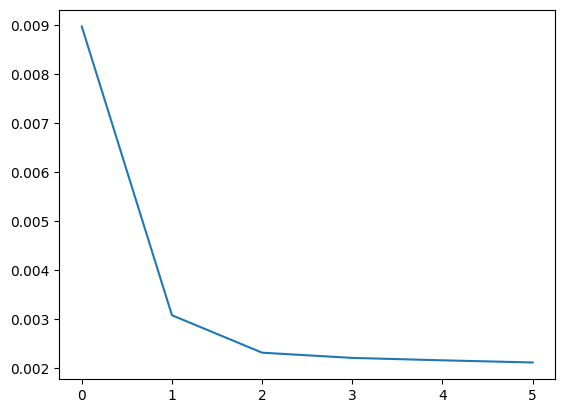

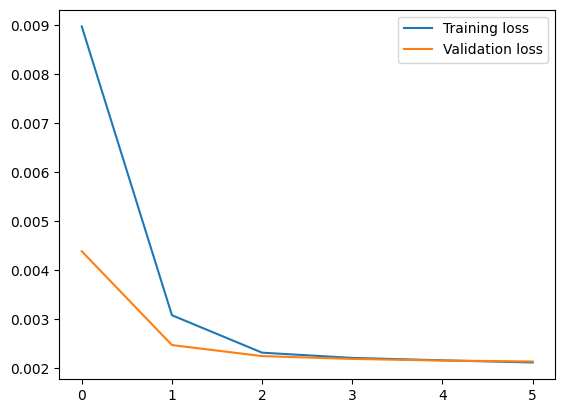

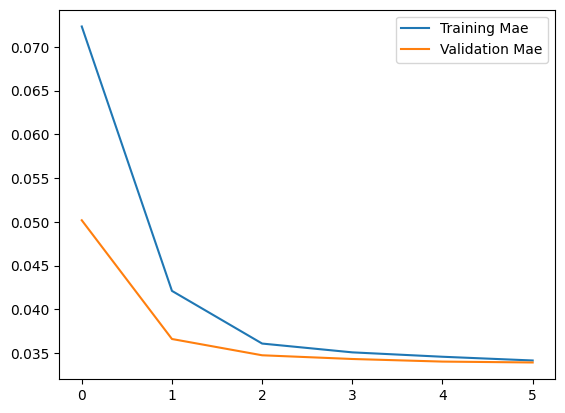

In [33]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 2s 8ms/step


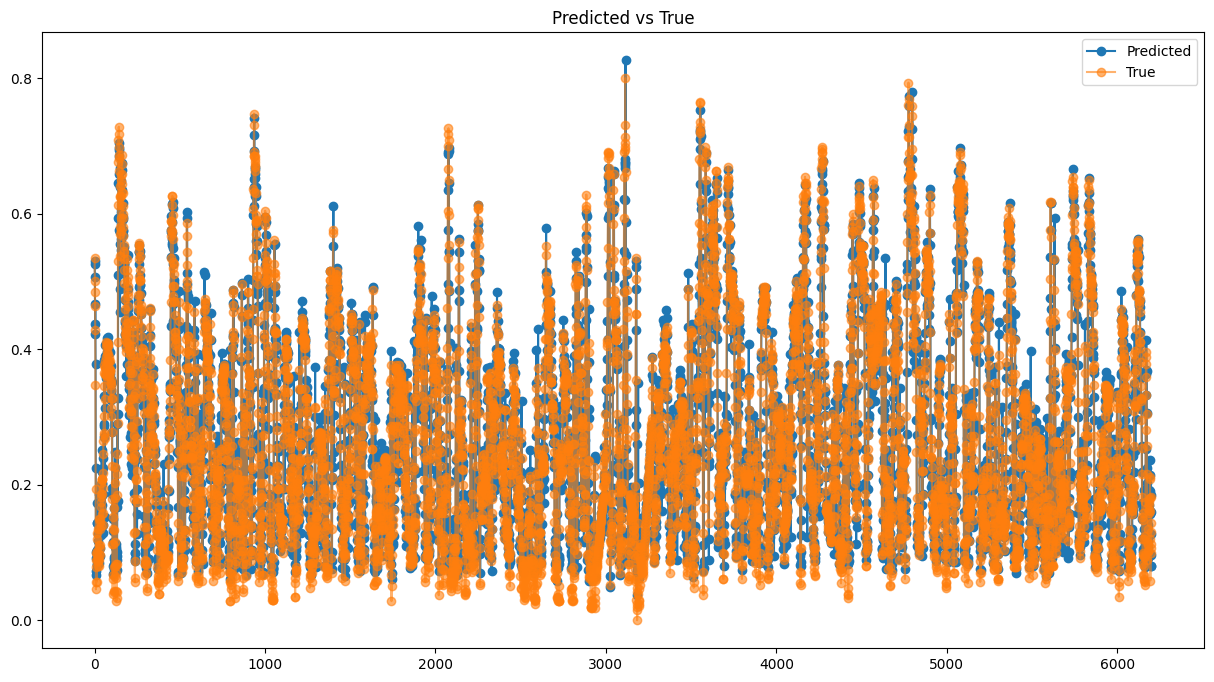

In [34]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [35]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03542202547730093,
 'mse': 0.049707043965245314,
 'rmse': 0.002470790219762831}

# Entrenamiento Bidirectional LSTM con dropout

In [36]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [37]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/bidirectional_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 30s 17ms/step - loss: 0.0089 - mae: 0.0717 - mse: 0.0089 - val_loss: 0.0043 - val_mae: 0.0501 - val_mse: 0.0043
Epoch 2/50
1551/1551 [==============================] - 25s 16ms/step - loss: 0.0045 - mae: 0.0512 - mse: 0.0045 - val_loss: 0.0037 - val_mae: 0.0467 - val_mse: 0.0037
Epoch 3/50
1551/1551 [==============================] - 26s 16ms/step - loss: 0.0037 - mae: 0.0463 - mse: 0.0037 - val_loss: 0.0036 - val_mae: 0.0466 - val_mse: 0.0036
Epoch 4/50
1551/1551 [==============================] - 26s 17ms/step - loss: 0.0034 - mae: 0.0442 - mse: 0.0034 - val_loss: 0.0032 - val_mae: 0.0440 - val_mse: 0.0032
Epoch 5/50
1551/1551 [==============================] - 26s 17ms/step - loss: 0.0032 - mae: 0.0429 - mse: 0.0032 - val_loss: 0.0034 - val_mae: 0.0454 - val_mse: 0.0034
Epoch 6/50
1551/1551 [==============================] - 27s 17ms/step - loss: 0.0031 - mae: 0.0422 - mse: 0.0031 - val_loss: 0.0032 - val_mae: 0.0435 - val_mse:

194/194 [==============================] - 1s 7ms/step - loss: 0.0035 - mae: 0.0447 - mse: 0.0035
test loss, test acc: [0.0035447017289698124, 0.04465654864907265, 0.0035447017289698124]


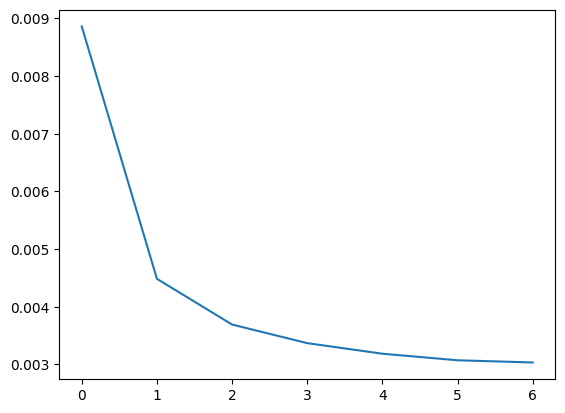

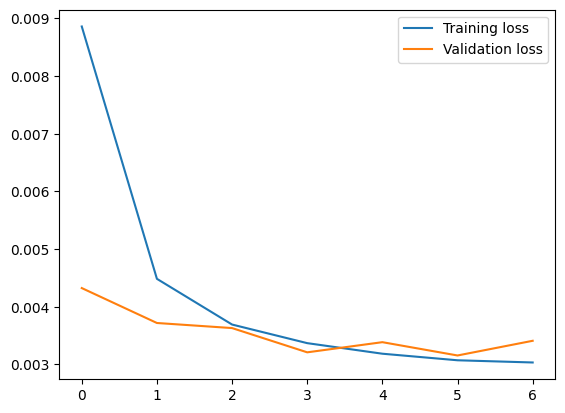

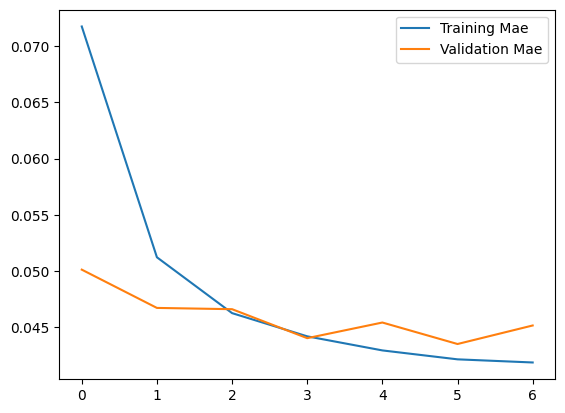

In [38]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 2s 6ms/step


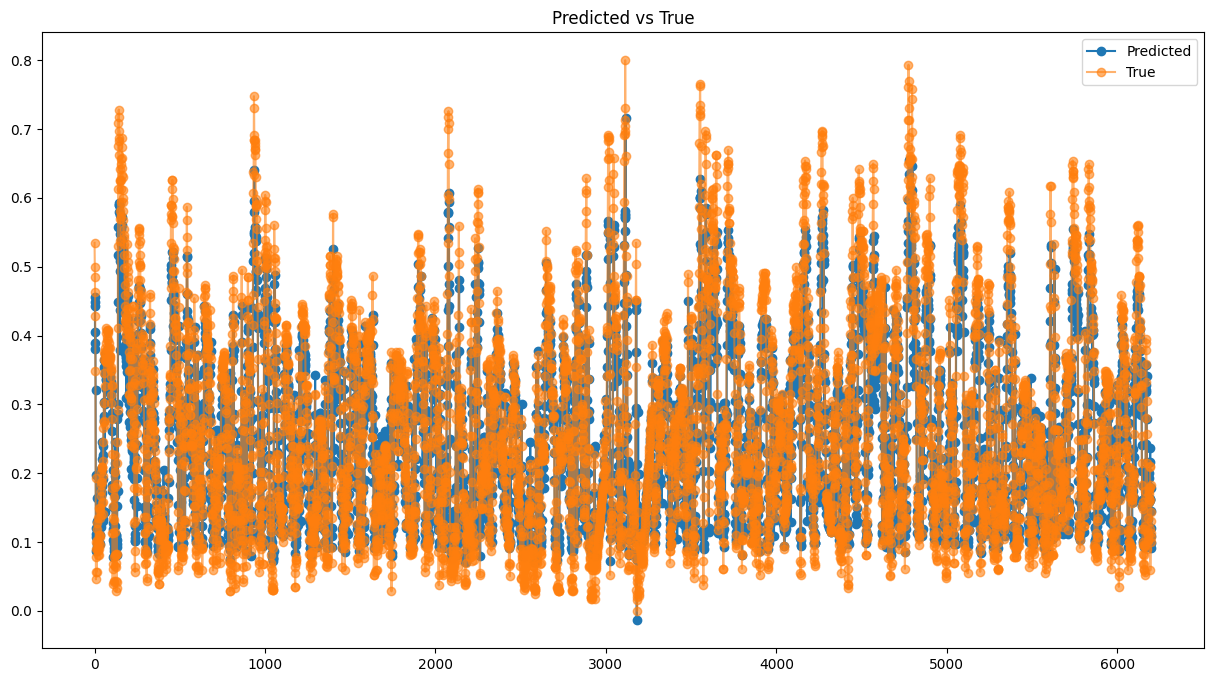

In [39]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [40]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.044656548156029444,
 'mse': 0.05953740424438804,
 'rmse': 0.003544702504159675}

# Entrenamiento Bidirectional LSTM sin dropout

In [41]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/bidirectional_NO_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 32s 18ms/step - loss: 0.0067 - mae: 0.0621 - mse: 0.0067 - val_loss: 0.0045 - val_mae: 0.0506 - val_mse: 0.0045
Epoch 2/50
1551/1551 [==============================] - 28s 18ms/step - loss: 0.0036 - mae: 0.0451 - mse: 0.0036 - val_loss: 0.0031 - val_mae: 0.0412 - val_mse: 0.0031
Epoch 3/50
1551/1551 [==============================] - 28s 18ms/step - loss: 0.0026 - mae: 0.0381 - mse: 0.0026 - val_loss: 0.0025 - val_mae: 0.0369 - val_mse: 0.0025
Epoch 4/50
1551/1551 [==============================] - 28s 18ms/step - loss: 0.0023 - mae: 0.0355 - mse: 0.0023 - val_loss: 0.0023 - val_mae: 0.0355 - val_mse: 0.0023
Epoch 5/50
1551/1551 [==============================] - 29s 19ms/step - loss: 0.0022 - mae: 0.0348 - mse: 0.0022 - val_loss: 0.0023 - val_mae: 0.0349 - val_mse: 0.0023
Epoch 6/50
1551/1551 [==============================] - 30s 19ms/step - loss: 0.0022 - mae: 0.0345 - mse: 0.0022 - val_loss: 0.0022 - val_mae: 0.0346 - val_mse:

194/194 [==============================] - 1s 7ms/step - loss: 0.0025 - mae: 0.0362 - mse: 0.0025
test loss, test acc: [0.002534568542614579, 0.03623875230550766, 0.002534568542614579]


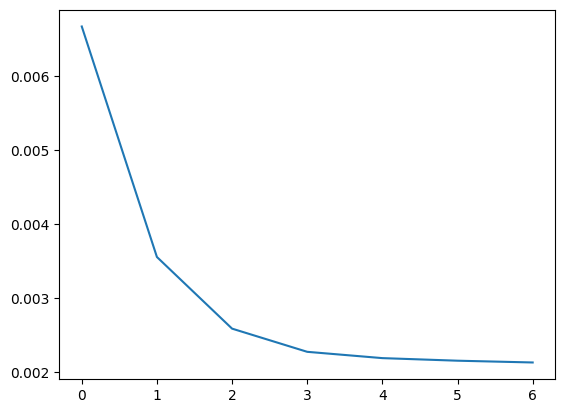

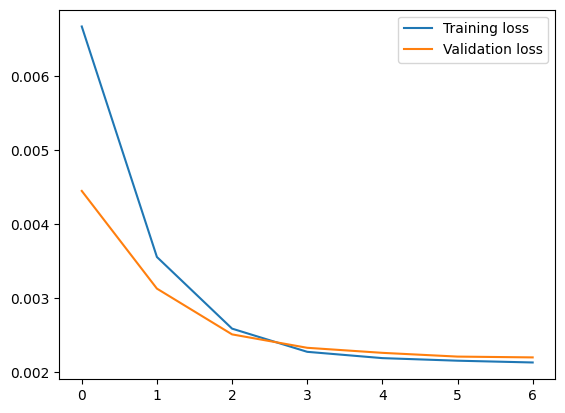

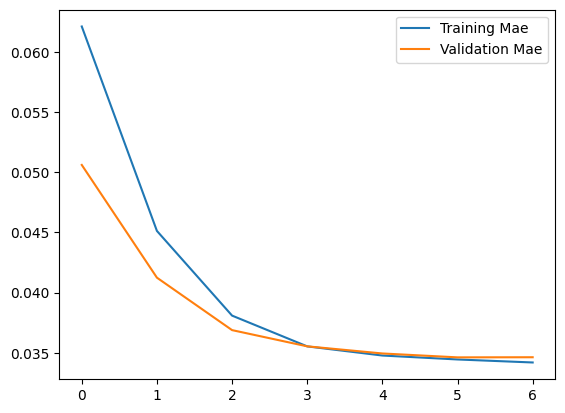

In [43]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 2s 6ms/step


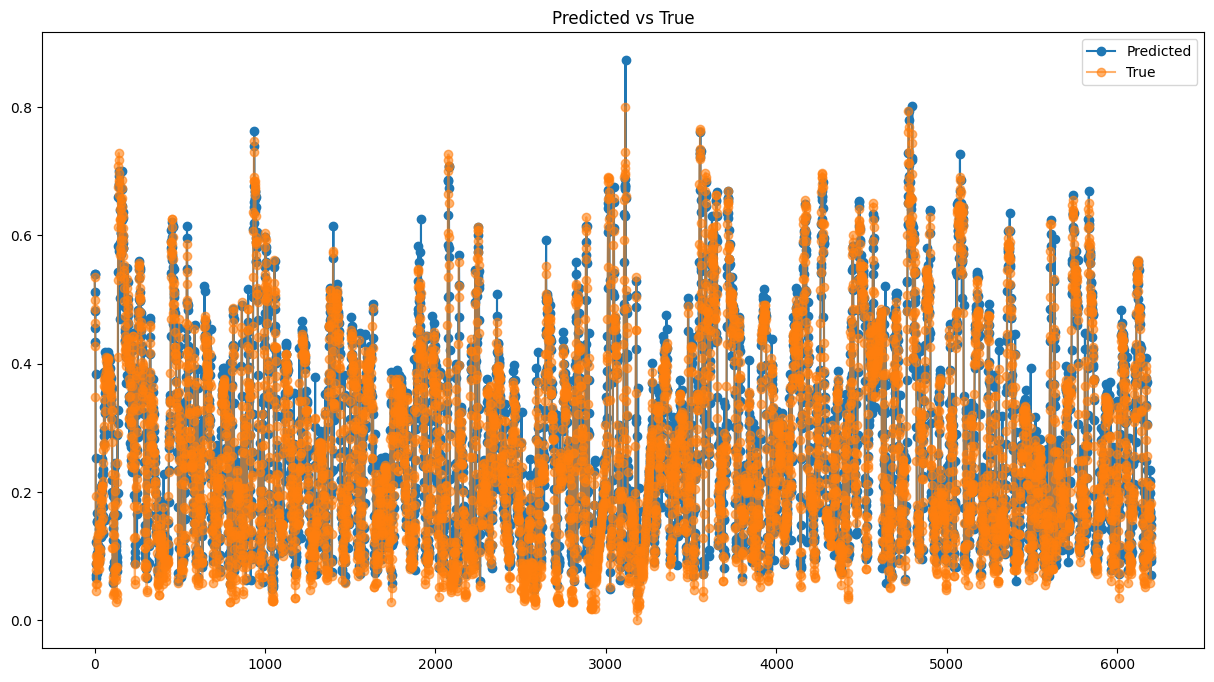

In [44]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [45]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03623874226794585,
 'mse': 0.050344502854013526,
 'rmse': 0.0025345689676177763}